
Valores encontrados

  w0 = 0.717213
  w1 = 1.535152



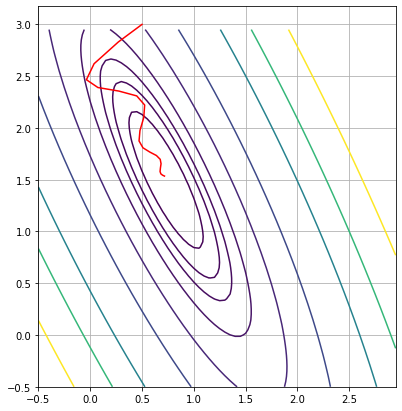

In [32]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


def SSE(w0, w1):
    return (sum( [(v - w0 - w1*u)**2  for u, v in zip(x, d)] ))


def gSSE(w0, w1):
    e = [(v - w0 - w1*u)  for u, v in zip(x, d)]
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([q*v for q, v in zip(e,x)])
    return (gw0, gw1)


def mejora(w0, w1, mu, beta):

    global previous_delta_w0
    global previous_delta_w1

    gw0, gw1 = gSSE(w0, w1)
    delta_w0 = - mu * gw0 + beta * previous_delta_w0
    delta_w1 = - mu * gw1 + beta * previous_delta_w1
    previous_delta_w0 = delta_w0
    previous_delta_w1 = delta_w1
    w0 = w0 + delta_w0
    w1 = w1 + delta_w1
    return (w0, w1)


def plot_contour():
    #
    W0 = np.arange(-0.5, 3.0, 0.05)
    W1 = np.arange(-0.5, 3.0, 0.05)
    W0, W1 = np.meshgrid(W0, W1)
    F = SSE(W0, W1)
    #
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect('equal', 'box')
    ax.contour(W0, W1, F, levels=[0, 1, 2, 3, 5, 10, 20, 40, 60, 90])
    ax.grid()



x = [
    0.1087,  0.2698,  0.3765,  0.2146,  0.9155,
    0.0246,  0.0221,  0.8632,  0.6460,  0.2092,
    0.8567,  0.1591,  0.9647,  0.6231,  0.7460,
    0.3654,  0.3065,  0.6886,  0.4966,  0.2008,
    0.2618,  0.7607,  0.1563,  0.4424,  0.7731
]

d = [
    0.9519,  1.1237,  1.2360,  1.0526,  2.0743,
    0.7906,  0.7603,  2.0533,  1.6887,  1.0563,
    2.0991,  0.8953,  2.1917,  1.6266,  1.8508,
    1.2828,  1.2283,  1.8722,  1.4657,  1.0418,
    1.1097,  1.7826,  0.9711,  1.4267,  1.8248
]


w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f  = [SSE(w0, w1)]

previous_delta_w0 = 0
previous_delta_w1 = 0

for epoch in range(20):
    #print(w0, w1)
    w0, w1 = mejora(w0, w1, 0.01, 0.7)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print('\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}\n'.format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color='red');

## Minibatch de 5 patrones 

In [39]:
def SSE_minibatch(w0, w1):
    return (sum( [(v - w0 - w1*u)**2  for u, v in zip(x_aux, d_aux)] ))


def gSSE_minibatch(w0, w1):
    e = [(v - w0 - w1*u)  for u, v in zip(x_aux, d_aux)]
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([q*v for q, v in zip(e,x_aux)])
    return (gw0, gw1)


def mejora_minibatch(w0, w1, mu, beta):

    global previous_delta_w0
    global previous_delta_w1

    gw0, gw1 = gSSE_minibatch(w0, w1)
    delta_w0 = - mu * gw0 + beta * previous_delta_w0
    delta_w1 = - mu * gw1 + beta * previous_delta_w1
    previous_delta_w0 = delta_w0
    previous_delta_w1 = delta_w1
    w0 = w0 + delta_w0
    w1 = w1 + delta_w1
    return (w0, w1)

w0 = 0.6790601592557445; w1 = 1.606322280396628; SSE = 0.07611749246216384


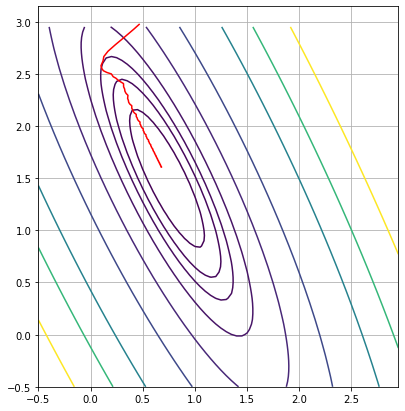

In [45]:
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):
    #print(w0, w1)
    for i in range (int(len(x)/5)):
      x_aux= x[ i*5: (5+i*5) ]
      d_aux= d[ i*5: (5+i*5) ]      
      w0, w1 = mejora_minibatch(w0, w1, 0.01, 0.7)  

      history_w0.append(w0)
      history_w1.append(w1)
      history_f.append(SSE(w0, w1))
          

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

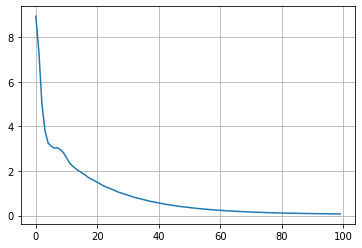

In [47]:
plt.plot(history_f, "-")
plt.grid()